# Read Annotation Data - All Annotators

In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)

In [2]:
# Create a list of ideologies to use in for loops later
ideologies = ['Turkish_Nationalism', 'Conservatism', 'Islamism', 'Liberalism', 'Kemalism']

## Week 1

- Already available in in Weeks 15-19

In [3]:
## Read data
#week_1 = pd.read_excel("../annotation/1st_week/20211009_self_contained_training_merged.xlsx")
#
## Drop unnecessary columns
#week_1 = week_1[['created_at', 'id_str', 'user_id_str', 'user_name', 'user_screen_name',
#       'user_location', 'user_description', 'user_created_at',
#       'created_at_year', 'created_at_month', 'created_at_day', 'number',
#       'Annotator', 'full_text', 'I\nTurkish Nationalism',
#       'I\nConservatism', 'I\nIslamism', 'I\nLiberalism', 'I \nKemalism']]
#
## Rename Ideology columns
#week_1.columns = ['created_at', 'id_str', 'user_id_str', 'user_name',
#       'user_screen_name', 'user_location', 'user_description',
#       'user_created_at', 'created_at_year', 'created_at_month',
#       'created_at_day', 'number', 'Annotator', 'full_text',
#       'Turkish_Nationalism', 'Conservatism', 'Islamism',
#       'Liberalism', 'Kemalism']
#
## Filter for "final" annotator
#week_1 = week_1[week_1["Annotator"] == "final"].reset_index(drop=True)
#
## Drop null rows for Ideology columns
#week_1 = week_1.iloc[week_1.iloc[:, -5:].dropna().index].reset_index(drop=True)
#
## Convert dtypes
#week_1.iloc[:, -5:] = week_1.iloc[:, -5:].astype("int64")

## Week 2

- No "final" annotator

In [4]:
## Read data
#week_2 = pd.read_excel("../annotation/2nd_week/20211002_self_contained_training_merged.xlsx")

In [5]:
#week_2["Annotator"].unique()

## Week 3

- "Final" annotator is empty

In [6]:
## Read data
#week_3 = pd.read_excel("../annotation/3rd_week/20211029_self_contained_tweets_901_24977_merged.xlsx")
#
## Drop unnecessary columns
#week_3 = week_3[['Annotator', '#', 'created_at', 'id_str', 'user_id_str', 'user_name',
#       'user_screen_name', 'user_location', 'user_description',
#       'user_created_at', 'created_at_year', 'created_at_month',
#       'created_at_day', 'full_text', 'I\nTurkish Nationalism',
#       'I\nConservatism', 'I\nIslamism', 'I\nLiberalism', 'I \nKemalism']]
#
## Drop unnecessary rows at the end (total disagreement counts, etc.)
#week_3 = week_3[:5505]
#
## Rename Ideology columns
#week_3.columns = ['Annotator', '#', 'created_at', 'id_str', 'user_id_str', 'user_name',
#                  'user_screen_name', 'user_location', 'user_description',
#                  'user_created_at', 'created_at_year', 'created_at_month',
#                  'created_at_day', 'full_text', 'Turkish Nationalism',
#                  'Conservatism', 'Islamism', 'Liberalism', 'Kemalism']
#
### Filter for "Final" annotator
#week_3 = week_3[week_3["Annotator"] == "Final"].reset_index(drop=True)
#
## Convert dtypes
#week_3["#"] = week_3["#"].astype("int64")

## Weeks 4-14

In [7]:
paths = []

for i in range(4, 15):
    for path in os.listdir(f"../annotation/adjudication/{i}"):
        #print(f"../annotation/adjudication/{i}/{path}")
        if path.endswith("xlsx"):
            paths.append(f"../annotation/adjudication/{i}/{path}")

In [8]:
df_1 = pd.DataFrame()

print("Combining DataFrames:")
for i, path in enumerate(paths):
    print(f"{i+1} in {len(paths)}", end="... ")
    df_1 = pd.concat([df_1, pd.read_excel(path, dtype=object)]).reset_index(drop=True)
    print("completed.")

Combining DataFrames:
1 in 24... completed.
2 in 24... completed.
3 in 24... completed.
4 in 24... completed.
5 in 24... completed.
6 in 24... completed.
7 in 24... completed.
8 in 24... completed.
9 in 24... completed.
10 in 24... completed.
11 in 24... completed.
12 in 24... completed.
13 in 24... completed.
14 in 24... completed.
15 in 24... completed.
16 in 24... completed.
17 in 24... completed.
18 in 24... completed.
19 in 24... completed.
20 in 24... completed.
21 in 24... completed.
22 in 24... completed.
23 in 24... completed.
24 in 24... completed.


In [9]:
# Filter for all annotators except "final"
df_1 = df_1[~(df_1["Annotator"] == "Final") & ~(df_1["Annotator"] == "final")].reset_index(drop=True)

# Drop empty rows ("disagreement", "positive disagreement", etc.)
df_1 = df_1.iloc[df_1["#"].dropna().index].reset_index(drop=True)

# Convert "created_at" and "user_created_at" to datetime object
df_1["created_at"] = pd.to_datetime(df_1["created_at"])
df_1["user_created_at"] = pd.to_datetime(df_1["user_created_at"])

# Drop unnecessary columns
df_1 = df_1[['Annotator', '#', 'created_at', 'id_str', 'user_id_str', 'user_name',
             'user_screen_name', 'user_location', 'user_description',
             'user_created_at', 'created_at_year', 'created_at_month',
             'created_at_day', 'full_text', 'I\nTurkish Nationalism', 'I\nConservatism',
             'I\nIslamism', 'I\nLiberalism', 'I \nKemalism']]

# Rename Ideology columns
df_1.columns = ['Annotator', '#', 'created_at', 'id_str', 'user_id_str', 'user_name',
              'user_screen_name', 'user_location', 'user_description',
              'user_created_at', 'created_at_year', 'created_at_month',
              'created_at_day', 'full_text', 'Turkish_Nationalism', 'Conservatism',
              'Islamism', 'Liberalism', 'Kemalism']

# Drop empty rows for Ideology columns
df_1 = df_1.dropna(subset=["Turkish_Nationalism", "Conservatism", "Islamism", "Liberalism", "Kemalism"]).reset_index(drop=True)

# Convert dtypes of Ideology columns
df_1.iloc[:, -5:] = df_1.iloc[:, -5:].astype("int64")

# Convert 2 labels into 1 in Ideology columns
for ideology in ideologies:
    df_1[ideology] = df_1[ideology].apply(lambda x: 1 if x == 2 else x)

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27118 entries, 0 to 27117
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Annotator            27118 non-null  object             
 1   #                    27118 non-null  object             
 2   created_at           27118 non-null  datetime64[ns, UTC]
 3   id_str               27118 non-null  object             
 4   user_id_str          27118 non-null  object             
 5   user_name            27118 non-null  object             
 6   user_screen_name     27118 non-null  object             
 7   user_location        17299 non-null  object             
 8   user_description     21280 non-null  object             
 9   user_created_at      27118 non-null  datetime64[ns, UTC]
 10  created_at_year      27118 non-null  object             
 11  created_at_month     27118 non-null  object             
 12  created_at_day    

## Weeks 15-19

In [11]:
paths = []

for i in range(15, 20):
    for path in os.listdir(f"../annotation/adjudication/{i}"):
        #print(f"../annotation/adjudication/{i}/{path}")
        paths.append(f"../annotation/adjudication/{i}/{path}")

In [12]:
df_2 = pd.DataFrame()

print("Combining DataFrames:")
for i, path in enumerate(paths):
    print(f"{i+1} in {len(paths)}", end="... ")
    df_2 = pd.concat([df_2, pd.read_excel(path, dtype=object)]).reset_index(drop=True)
    print("completed.")

Combining DataFrames:
1 in 15... completed.
2 in 15... completed.
3 in 15... completed.
4 in 15... completed.
5 in 15... completed.
6 in 15... completed.
7 in 15... completed.
8 in 15... completed.
9 in 15... completed.
10 in 15... completed.
11 in 15... completed.
12 in 15... completed.
13 in 15... completed.
14 in 15... completed.
15 in 15... completed.


In [13]:
# Filter for all annotators except "final"
df_2 = df_2[~(df_2["Annotator"] == "Final") & ~(df_2["Annotator"] == "final")].reset_index(drop=True)

# Convert "created_at" and "user_created_at" to datetime object
df_2["created_at"] = pd.to_datetime(df_2["created_at"])
df_2["user_created_at"] = pd.to_datetime(df_2["user_created_at"])

# Drop unnecessary columns
df_2 = df_2[['Annotator', '#', 'created_at', 'id_str', 'user_id_str', 'user_name',
             'user_screen_name', 'user_location', 'user_description',
             'user_created_at', 'created_at_year', 'created_at_month',
             'created_at_day', 'full_text', 'I\nTurkish Nationalism', 'I\nConservatism',
             'I\nIslamism', 'I\nLiberalism', 'I \nKemalism']]

# Rename Ideology columns
df_2.columns = ['Annotator', '#', 'created_at', 'id_str', 'user_id_str', 'user_name',
              'user_screen_name', 'user_location', 'user_description',
              'user_created_at', 'created_at_year', 'created_at_month',
              'created_at_day', 'full_text', 'Turkish_Nationalism', 'Conservatism',
              'Islamism', 'Liberalism', 'Kemalism']

# Drop empty rows for Ideology columns
df_2 = df_2.dropna(subset=["Turkish_Nationalism", "Conservatism", "Islamism", "Liberalism", "Kemalism"]).reset_index(drop=True)

# Convert dtypes of Ideology columns
df_2.iloc[:, -5:] = df_2.iloc[:, -5:].astype("int64")

# Convert 2 labels into 1 in Ideology columns
for ideology in ideologies:
    df_2[ideology] = df_2[ideology].apply(lambda x: 1 if x == 2 else x)

In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20966 entries, 0 to 20965
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Annotator            20966 non-null  object             
 1   #                    20966 non-null  object             
 2   created_at           20966 non-null  datetime64[ns, UTC]
 3   id_str               20966 non-null  object             
 4   user_id_str          20966 non-null  object             
 5   user_name            20966 non-null  object             
 6   user_screen_name     20966 non-null  object             
 7   user_location        13219 non-null  object             
 8   user_description     16391 non-null  object             
 9   user_created_at      20966 non-null  datetime64[ns, UTC]
 10  created_at_year      20966 non-null  object             
 11  created_at_month     20966 non-null  object             
 12  created_at_day    

## Combine DataFrames

In [15]:
# Combine df_1 and df_2
df = pd.concat([df_1, df_2]).reset_index(drop=True)

# Sort by "#"
df = df.sort_values("#").reset_index(drop=True)

# Converting dtypes
df[["id_str", "user_id_str"]] = df[["id_str", "user_id_str"]].astype("str")
df[["created_at_year", "created_at_month", "created_at_day"]] = df[["created_at_year", "created_at_month", "created_at_day"]].astype("int64")

In [16]:
df.shape

(48084, 19)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48084 entries, 0 to 48083
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Annotator            48084 non-null  object             
 1   #                    48084 non-null  object             
 2   created_at           48084 non-null  datetime64[ns, UTC]
 3   id_str               48084 non-null  object             
 4   user_id_str          48084 non-null  object             
 5   user_name            48084 non-null  object             
 6   user_screen_name     48084 non-null  object             
 7   user_location        30518 non-null  object             
 8   user_description     37671 non-null  object             
 9   user_created_at      48084 non-null  datetime64[ns, UTC]
 10  created_at_year      48084 non-null  int64              
 11  created_at_month     48084 non-null  int64              
 12  created_at_day    

In [18]:
df.head()

,Annotator,#,created_at,id_str,user_id_str,user_name,user_screen_name,user_location,user_description,user_created_at,created_at_year,created_at_month,created_at_day,full_text,Turkish_Nationalism,Conservatism,Islamism,Liberalism,Kemalism
0,erdem,1,2021-08-18 11:38:30+00:00,1427958076259377160,351646870,Bülent USLU,bulentuslu1903,İSTANBUL,🦅Beşiktaş Kongre Üyesi🦅🤍🖤,2011-08-09 15:05:57+00:00,2021,8,18,Caner’in dudak okumasıyla ettiği küfürler için...,0,0,0,0,0
1,duygu,1,2021-08-18 11:38:30+00:00,1427958076259377160,351646870,Bülent USLU,bulentuslu1903,İSTANBUL,🦅Beşiktaş Kongre Üyesi🦅🤍🖤,2011-08-09 15:05:57+00:00,2021,8,18,Caner’in dudak okumasıyla ettiği küfürler için...,0,0,0,0,0
2,duygu,2,2013-05-03 18:22:37+00:00,330386930283978753,460548834,hasan bora,pasivat,suadiye,https://t.co/HZ3jPWGoZH,2012-01-10 21:45:27+00:00,2013,5,3,Herkese iyi akşamlar hafta sonunuz çok çok güz...,0,0,0,0,0
3,erdem,2,2013-05-03 18:22:37+00:00,330386930283978753,460548834,hasan bora,pasivat,suadiye,https://t.co/HZ3jPWGoZH,2012-01-10 21:45:27+00:00,2013,5,3,Herkese iyi akşamlar hafta sonunuz çok çok güz...,0,0,0,0,0
4,duygu,3,2021-03-09 19:03:18+00:00,1369363182683381764,888342558182711297,İbrahim Yıldız,Stratejist_57,NaN,YarımKalmışHukukHikayesi,2017-07-21 10:19:05+00:00,2021,3,9,82 yaşında alzheimer hastası bir insanı bile c...,0,0,0,1,0


## Summing annotations of different annotators

In [19]:
df = pd.concat([pd.Series(["Multiple"]*df.drop_duplicates("#").shape[0], name="Annotator"), pd.merge(df.drop_duplicates("#").reset_index(drop=True).iloc[:, 1:-5], df.groupby("#")[['Turkish_Nationalism', 'Conservatism', 'Islamism', 'Liberalism', 'Kemalism']].sum().reset_index())], axis=1)

In [20]:
# Ideology value counts
ideology_value_counts = pd.concat([df[f"{ideology}"].value_counts() for ideology in ideologies], axis=1)
display(ideology_value_counts)

,Turkish_Nationalism,Conservatism,Islamism,Liberalism,Kemalism
0,22298,23520,23371,23376,23611
1,1053,517,505,610,239
2,749,63,224,114,250


In [21]:
#df.to_csv("annotations_all_annotators.csv", index=False, encoding="utf-8")

## Exploratory Data Analysis

In [22]:
print(f"Unique tweet count: {df['#'].nunique()}")
print(f"Unique user count:  {df['user_id_str'].nunique()}")

Unique tweet count: 24100
Unique user count:  8763


In [23]:
# Tweet Counts per Year
tweet_count_by_year = pd.DataFrame(df["created_at"].apply(lambda x: x.year).value_counts().sort_index()).reset_index().rename({"index":"year", "created_at":"tweet_count"}, axis=1)
tweet_count_by_year = pd.concat([tweet_count_by_year, pd.Series([f"{x:.2f}%" for x in (tweet_count_by_year["tweet_count"] / tweet_count_by_year["tweet_count"].sum() * 100)], name="percentage")], axis=1)
display(tweet_count_by_year)

,year,tweet_count,percentage
0,2009,11,0.05%
1,2010,68,0.28%
2,2011,371,1.54%
3,2012,904,3.75%
4,2013,1497,6.21%
5,2014,1294,5.37%
6,2015,1204,5.00%
7,2016,1406,5.83%
8,2017,1475,6.12%
9,2018,1899,7.88%


In [24]:
# Null percentage of columns
missing_data = pd.concat([pd.Series(df.columns, name="col_name"), pd.Series([f"{x:.2f}%" for x in (df.isna().sum() / df.shape[0] *100).values], name="missing_percentage")], axis=1)
missing_data

,col_name,missing_percentage
0,Annotator,0.00%
1,#,0.00%
2,created_at,0.00%
3,id_str,0.00%
4,user_id_str,0.00%
5,user_name,0.00%
6,user_screen_name,0.00%
7,user_location,36.53%
8,user_description,21.67%
9,user_created_at,0.00%


Missing tweet nums:   1125-2000
Missing tweet length: 876


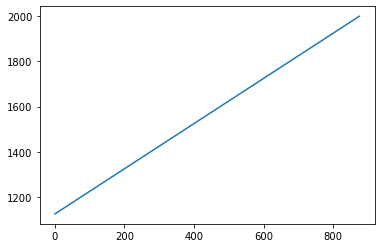

In [25]:
# missing tweet #s
tweet_nums = list(df["#"])
missing_tweet_nums = []

for i in range(1, 24977):
    if i not in tweet_nums:
        missing_tweet_nums.append(i)
        
print(f"Missing tweet nums:   {missing_tweet_nums[0]}-{missing_tweet_nums[-1]}")
print(f"Missing tweet length: {len(missing_tweet_nums)}")

pd.Series(missing_tweet_nums).plot();

## Word Count Analysis & Word Cloud

In [26]:
import string
from collections import Counter

In [27]:
def replace_newline(tweet):
    return tweet.replace("\n", " ")

In [28]:
turkish_nationalism_tweets, conservatism_tweets, islamism_tweets, liberalism_tweets, kemalism_tweets = [pd.Series(list(df[df[ideology] != 0]["full_text"].unique())) for ideology in ideologies]

turkish_nationalism_tweets = turkish_nationalism_tweets.apply(replace_newline)
conservatism_tweets = conservatism_tweets.apply(replace_newline)
islamism_tweets = islamism_tweets.apply(replace_newline)
liberalism_tweets = liberalism_tweets.apply(replace_newline)
kemalism_tweets = kemalism_tweets.apply(replace_newline)

ideology_tweets = [turkish_nationalism_tweets, conservatism_tweets, islamism_tweets, liberalism_tweets, kemalism_tweets]

In [29]:
# Turkish Stop Words
trstop = [
    'a', 'acaba', 'altı', 'altmış', 'ama', 'ancak', 'arada', 'artık', 'asla', 'aslında', 'aslında', 'ayrıca', 'az', 'bana',
    'bazen', 'bazı', 'bazıları', 'belki', 'ben', 'benden', 'beni', 'benim', 'beri', 'beş', 'bile', 'bilhassa', 'bin', 'bir',
    'biraz', 'birçoğu', 'birçok', 'biri', 'birisi', 'birkaç', 'birşey', 'biz', 'bizden', 'bize', 'bizi', 'bizim', 'böyle',
    'böylece', 'bu', 'buna', 'bunda', 'bundan', 'bunlar', 'bunları', 'bunların', 'bunu', 'bunun', 'burada', 'bütün', 'çoğu',
    'çoğunu', 'çok', 'çünkü', 'da', 'daha', 'dahi', 'dan', 'de', 'defa', 'değil', 'diğer', 'diğeri', 'diğerleri', 'diye',
    'doksan', 'dokuz', 'dolayı', 'dolayısıyla', 'dört', 'e', 'edecek', 'eden', 'ederek', 'edilecek', 'ediliyor', 'edilmesi',
    'ediyor', 'eğer', 'elbette', 'elli', 'en', 'etmesi', 'etti', 'ettiği', 'ettiğini', 'fakat', 'falan', 'filan', 'gene',
    'gereği', 'gerek', 'gibi', 'göre', 'hala', 'halde', 'halen', 'hangi', 'hangisi', 'hani', 'hatta', 'hem', 'henüz', 'hep',
    'hepsi', 'her', 'herhangi', 'herkes', 'herkese', 'herkesi', 'herkesin', 'hiç', 'hiçbir', 'hiçbiri', 'i', 'ı', 'için',
    'içinde', 'iki', 'ile', 'ilgili', 'ise', 'işte', 'itibaren', 'itibariyle', 'kaç', 'kadar', 'karşın', 'kendi', 'kendilerine',
    'kendine', 'kendini', 'kendisi', 'kendisine', 'kendisini', 'kez', 'ki', 'kim', 'kime', 'kimi', 'kimin', 'kimisi', 'kimse',
    'kırk', 'madem', 'mi', 'mı', 'milyar', 'milyon', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nedenle', 'nerde', 'nerede', 'nereye',
    'neyse', 'niçin', 'nin', 'nın', 'niye', 'nun', 'nün', 'o', 'öbür', 'olan', 'olarak', 'oldu', 'olduğu', 'olduğunu',
    'olduklarını', 'olmadı', 'olmadığı', 'olmak', 'olması', 'olmayan', 'olmaz', 'olsa', 'olsun', 'olup', 'olur', 'olur',
    'olursa', 'oluyor', 'on', 'ön', 'ona', 'önce', 'ondan', 'onlar', 'onlara', 'onlardan', 'onları', 'onların', 'onu', 'onun',
    'orada', 'öte', 'ötürü', 'otuz', 'öyle', 'oysa', 'pek', 'rağmen', 'sana', 'sanki', 'sanki', 'şayet', 'şekilde', 'sekiz',
    'seksen', 'sen', 'senden', 'seni', 'senin', 'şey', 'şeyden', 'şeye', 'şeyi', 'şeyler', 'şimdi', 'siz', 'siz', 'sizden',
    'sizden', 'size', 'sizi', 'sizi', 'sizin', 'sizin', 'sonra', 'şöyle', 'şu', 'şuna', 'şunları', 'şunu', 'ta', 'tabii',
    'tam', 'tamam', 'tamamen', 'tarafından', 'trilyon', 'tüm', 'tümü', 'u', 'ü', 'üç', 'un', 'ün', 'üzere', 'var', 'vardı',
    've', 'veya', 'ya', 'yani', 'yapacak', 'yapılan', 'yapılması', 'yapıyor', 'yapmak', 'yaptı', 'yaptığı', 'yaptığını',
    'yaptıkları', 'ye', 'yedi', 'yerine', 'yetmiş', 'yi', 'yı', 'yine', 'yirmi', 'yoksa', 'yu', 'yüz', 'zaten', 'zira'
] # https://github.com/ahmetax/trstop/blob/master/dosyalar/turkce-stop-words

nltk_trstop = [
    'acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha',
    'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim',
    'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu',
    'tüm', 've', 'veya', 'ya', 'yani'
] # https://github.com/xiamx/node-nltk-stopwords/blob/master/data/stopwords/turkish

add_stop = [
    'a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'ğ', 'h', 'ı', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'ö', 'p', 'r', 's', 'ş', 't',
    'u', 'ü', 'v', 'y', 'z', 'li', 'lı', 'si', 'sı', 'te', 'ta', 'ın', 'in', 'na', 'ne', 'ler', 'lar', 'de', 'da', 'nın', 'nin',
    'lık', 'ım', 'im', 'yok'
]

stop_words = sorted(list(set(trstop).union(nltk_trstop).union(add_stop)))

In [30]:
def find_most_common(tweet_list, remove_stops=True):
    tweet_list = [tweet.replace("İ", "i").lower() for tweet in tweet_list]
    tweet_list = [tweet.translate(str.maketrans(' ', ' ', ''.join([item for item in string.punctuation if item not in ["#", "@"]]))) for tweet in tweet_list]
    
    words = []

    for tweet in tweet_list:
        for word in tweet.split():
            if remove_stops:
                if word not in stop_words:
                    words.append(word)
            else:
                words.append(word)
            
    return Counter(words).most_common()

In [31]:
turkish_nationalism_words = pd.Series(find_most_common(turkish_nationalism_tweets)[:200], name="Turkish Nationalism")
conservatism_words = pd.Series(find_most_common(conservatism_tweets)[:200], name="Conservatism")
islamism_words = pd.Series(find_most_common(islamism_tweets)[:200], name="Islamism")
liberalism_words = pd.Series(find_most_common(liberalism_tweets)[:200], name="Liberalism")
kemalism_words = pd.Series(find_most_common(kemalism_tweets)[:200], name="Kemalism")

In [32]:
word_counts = pd.concat([turkish_nationalism_words, conservatism_words, islamism_words, liberalism_words, kemalism_words], axis=1)
word_counts[:60]

,Turkish Nationalism,Conservatism,Islamism,Liberalism,Kemalism
0,"(türk, 247)","(devlet, 33)","(islam, 51)","(@rterdogan, 35)","(atatürk, 116)"
1,"(türkiye, 133)","(türk, 31)","(allah, 44)","(demokrasi, 26)","(kemal, 62)"
2,"(milli, 129)","(allah, 29)","(müslüman, 41)","(türkiye, 24)","(mustafa, 61)"
3,"(şehit, 113)","(türkiye, 26)","(israil, 41)","(zaman, 24)","(türk, 47)"
4,"(allah, 102)","(yeni, 25)","(türk, 33)","(adalet, 23)","(cumhuriyet, 30)"
5,"(vatan, 99)","(ak, 22)","(din, 28)","(büyük, 23)","(büyük, 29)"
6,"(rahmet, 97)","(zaman, 22)","(türkiye, 24)","(yeni, 21)","(kutlu, 27)"
7,"(pkk, 75)","(erdoğan, 22)","(tek, 21)","(ülkede, 21)","(tek, 26)"
8,"(devlet, 63)","(büyük, 22)","(bugün, 20)","(karşı, 21)","(gazi, 25)"
9,"(millet, 63)","(karşı, 20)","(ayasofya, 20)","(ülke, 21)","(türkiye, 24)"


In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
def all_words_in_tweets(tweet_list, remove_stops=True):
    tweet_list = [tweet.replace("İ", "i").lower() for tweet in tweet_list]
    tweet_list = [tweet.translate(str.maketrans(' ', ' ', ''.join([item for item in string.punctuation if item not in ["#", "@"]]))) for tweet in tweet_list]
    
    words = []

    for tweet in tweet_list:
        for word in tweet.split():
            if remove_stops:
                if word not in stop_words:
                    words.append(word)
            else:
                words.append(word)
            
    return ' '.join(words)

In [35]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_words_in_tweets(ideology_tweets[0]))

Ideology: Turkish_Nationalism


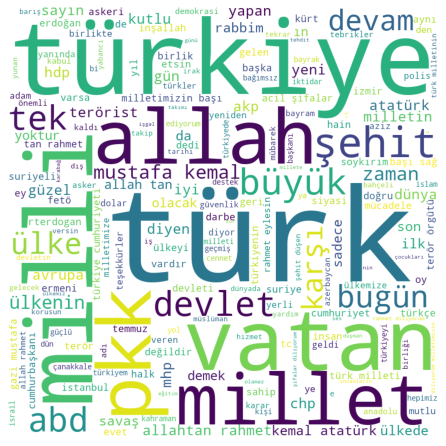

Ideology: Conservatism


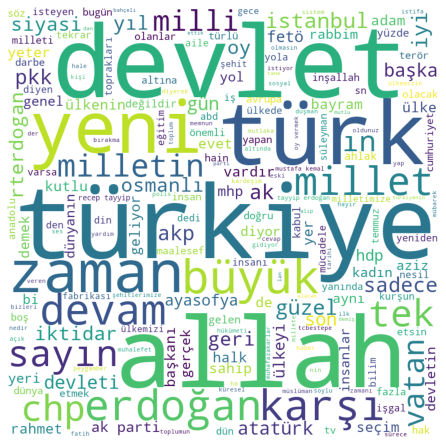

Ideology: Islamism


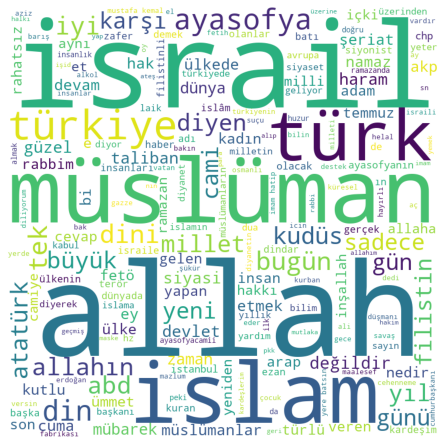

Ideology: Liberalism


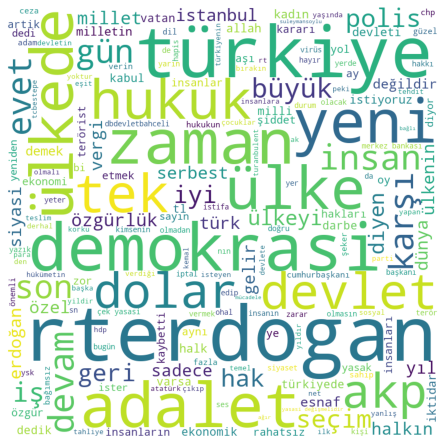

Ideology: Kemalism


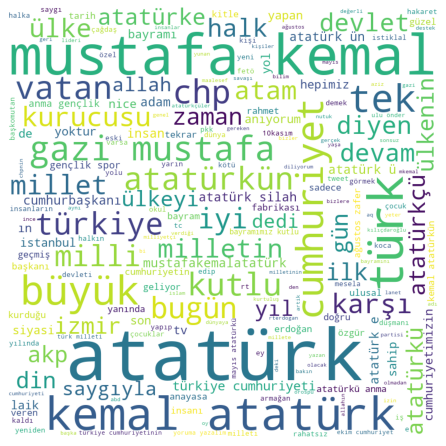

In [36]:
for i in range(5):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10, random_state=530).generate(all_words_in_tweets(ideology_tweets[i]))
    
    print(f"Ideology: {ideologies[i]:}")
    
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
     
    plt.show()

## Hashtags

In [37]:
def hashtag_counter(tweet_list):
    hashtags_list = []
    
    for tweet in tweet_list:
        for word in tweet.split():
            if word.startswith("#"):
                hashtags_list.append(word.lower())
    
    return pd.Series(Counter(hashtags_list).most_common())

In [38]:
hashtags_df = pd.concat([hashtag_counter(tweet_list) for tweet_list in ideology_tweets], axis=1).rename(dict(zip(range(5), ideologies)), axis=1)
hashtags_df.head(30)

,Turkish_Nationalism,Conservatism,Islamism,Liberalism,Kemalism
0,"(#fileninsultanları, 10)","(#affetmi̇yoruz, 3)","(#ayasofyacamii, 7)","(#şekerfabrikalarısatılmasın, 4)","(#atatürk, 7)"
1,"(#sehitlerimizvar, 6)","(#özgürlükhaki̇ktidarak, 3)","(#mescidiaksa, 5)","(#rtalb, 3)","(#10kasım, 5)"
2,"(#fileninsultanlari, 6)","(#erdoğanlabirlikteyiz, 2)","(#filistin, 4)","(#743bebekhapiste, 3)","(#mustafakemalatatürk, 5)"
3,"(#millihesaplaryanyana, 6)","(#türkiyekazandı, 2)","(#ayasofya, 4)","(#direnankara, 3)","(#19mayıs1919, 3)"
4,"(#tur, 6)","(#yenianayasa, 1)","(#unutmadimaklımda, 3)","(#protestoediyorum, 3)","(#18mart, 2)"
5,"(#terörelanetolsun, 5)","(#bogazicilgbtrezaleti, 1)","(#gazze, 3)","(#vaka670, 2)","(#mustafakemalatatürkً, 2)"
6,"(#nemutlutürkümdiyene, 5)","(#buişinsonu, 1)","(#freequds, 3)","(#meclistedarbevar, 2)","(#minnettarızatatürk, 2)"
7,"(#millihesaplarburada, 5)","(#atesincocukları, 1)","(#bubenimbayramımdeğil, 2)","(#pcrdayatmasıdurdurulsun, 2)","(#atatürkçülerbirleşiyor, 2)"
8,"(#idlib, 4)","(#kundakcıpkk, 1)","(#diyanetkapatılsın, 2)","(#yskgöreve, 2)","(#atatürkatamızdeğil, 2)"
9,"(#millipartiyükseliyor, 4)","(#israilterorist, 1)","(#heartsinegypt, 2)","(#intizar, 2)","(#atatürksüzanayasai̇stiyorum, 2)"
